In [1]:
import numpy as np
import  pandas as pd
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn.metrics import classification_report
from plot_keras_history import plot_history
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data=pd.read_csv('DATA.csv')

In [3]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data['label']=data['label'].replace(2,1)

In [5]:
X=data['combined_result']
y=data['label']
time_series=data['t_dist']

In [6]:
# Extracting sequences from the dataset
sequences=[]
labels=[]
temp=[]
    
for index,value in y.items():
    if value==1:
        temp.append(X[index])
        if (index+1)<len(y) and y[index+1]==0:
            sequences.append(temp)
            labels.append(1)
            temp=[]
    if value==0:
        temp.append(X[index])
        if (index+1)<len(y) and y[index+1]==1:
            sequences.append(temp)
            labels.append(0)
            temp=[]

In [7]:
# Not a sequence but label is 1 
zero_seq_label_one=[]
for position, sublist in enumerate(sequences):
    if all(element == 0 for element in sublist):
        if labels[position]==1:
            zero_seq_label_one.append(position)

In [8]:
# Replacing those with 0
for value in zero_seq_label_one:
    labels[value]=0

In [9]:
# Is a sequence but label 0
seq_label_zero=[]
for position, sublist in enumerate(sequences):
    if any(element != 0 for element in sublist):
        if labels[position]==0:
            seq_label_zero.append(position)

In [10]:
# Replacing those with 1
for value in seq_label_zero:
    labels[value]=1

In [11]:
print(len(seq_label_zero))

127


In [12]:
# Checking the Number of events
zero=0
one=0
for value in labels:
    if value==0:
        zero+=1
    if value==1:
        one+=1
print(zero)
print(one)

655
794


In [13]:
# Train test splitt
X_train,X_test,y_train,y_test=train_test_split(sequences,labels,test_size=0.2,random_state=42)

In [14]:
print(X_test[78])

[0.004, 0.002, 0.0, 0.0, 0.0, 0.0, 0.011, 0.002, 0.003, 0.012, 0.012, 0.009, 0.003, 0.0, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [15]:
# Padding and reshaping
X_train=pad_sequences(X_train,padding='post',truncating='post',dtype=float,maxlen=50)
X_test=pad_sequences(X_test,padding='post',truncating='post',dtype=float,maxlen=50)

In [16]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [17]:
y_train.shape

(1159, 1)

In [18]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(1159, 50, 1)

In [19]:
# It is because Our each  sequence has max laength of 50 and in output we want to predict a label
Tx=50
Ty=1
repeator = tf.keras.layers.RepeatVector(Tx)
concatenator = tf.keras.layers.Concatenate(axis=-1)
densor1 =tf.keras.layers. Dense(10, activation = "tanh")
densor2 = tf.keras.layers.Dense(1, activation = "relu")
activator = tf.keras.layers.Activation('softmax', name='attention_weights') # We are using a custom softmax(axis = 1) loaded in this notebook
dotor =tf.keras.layers. Dot(axes = 1)

In [20]:
def one_step_attention(a,s_prev):
    # We done this to change s_prev to shape of(m,Tx,n_s) for cocatination with a, because concatenation requires all dimension same accept concat axis in this 
    # case is last one so a and s_prev have same first two dims (m,Tx) but last one is changed
    s_prev=repeator(s_prev)
    # We will here concatenate a and s_prev
    concat=concatenator([a,s_prev])
    # here i will calculate energies with 2 dense layers
    e=densor1(concat)
    energies=densor2(e)
    # we know alpha is softmax of this energy
    alpha=activator(energies)
    # to calculate context vector we take dot product of alpha and a
    context_vector=dotor([alpha,a])
    return context_vector

In [21]:
n_a = 32 # number of units for the pre-attention, bi-directional LSTM's hidden state 'a'
n_s = 64 # number of units for the post-attention LSTM's hidden state "s"

# Please note, this is the post attention LSTM cell.
post_activation_LSTM_cell = tf.keras.layers.LSTM(n_s, return_state = True) # Please do not modify this global variable.
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [22]:
def modelf(Tx,Ty,n_a, n_s):
    X=tf.keras.layers.Input(shape=(X_train.shape[1],1)) # because embedding layer only demands the sequence length if i give full shape like (m,Tx) the
    # ouput of embedding layer will be 4D which can not be fed into BILSTM
    # hidden state for post LSTM
    s0 = tf.keras.layers.Input(shape=(n_s,), name='s0')
    # cell state for post lstm
    # because we know From CampusX that shape of hidden and cell state of lstm are equal
    c0 = tf.keras.layers.Input(shape=(n_s,), name='c0')
    s=s0
    c=c0
    outputs = []
    
    a = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(n_a,return_sequences=True),input_shape=(X_train.shape[1],1))(X)

    for t in range(Ty):
        context=one_step_attention(a,s)
        _,s,c=post_activation_LSTM_cell(context,initial_state = [s,c] )
        out = output_layer(s)
        outputs.append(out)


        
    print(outputs)
    model=tf.keras.models.Model(inputs=[X,s0,c0],outputs=outputs)

    return model

In [23]:
model = modelf(Tx, Ty, n_a, n_s)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>]


In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001,beta_1=0.9,beta_2=0.999)#0.00001
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = opt, metrics = ['accuracy'])

In [25]:
# For Training Set
m=X_train.shape[0]
s0 = np.zeros((m, n_s))
c0 = np.zeros((m, n_s))

In [26]:
# For test set
m_test=X_test.shape[0]
s0_test = np.zeros((m_test, n_s))
c0_test = np.zeros((m_test, n_s))

In [28]:
model_history=model.fit([X_train, s0, c0], y_train, epochs=500, batch_size=100,validation_data=([X_test, s0_test, c0_test],y_test))#350

Epoch 1/500


KeyboardInterrupt: 

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

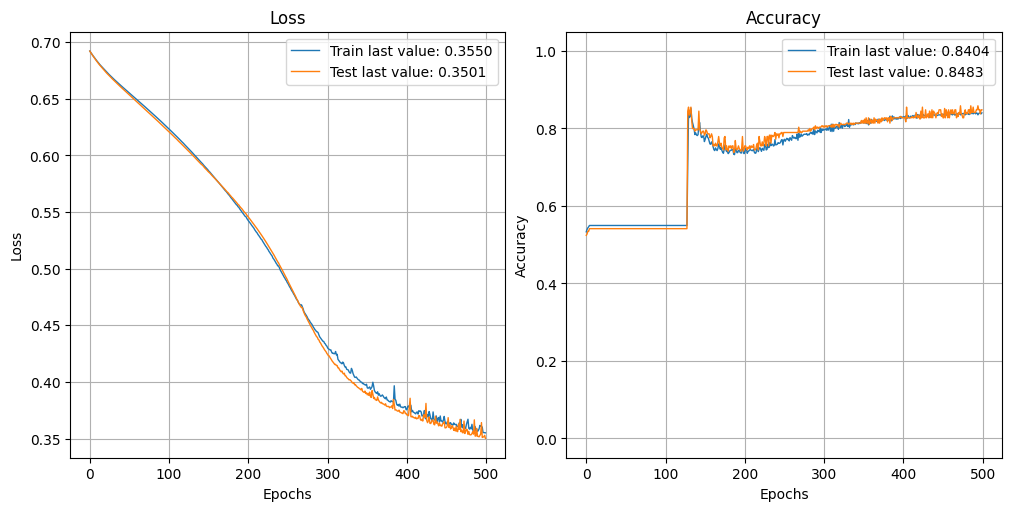

In [50]:
plot_history(model_history,show_standard_deviation=False,show_average=True)

In [27]:
#model.save_weights('Sequence-model-with-attention.h5')
model.load_weights('Sequence-model-with-attention.h5')

In [28]:
# Predicted on Test Set
pred=model.predict([X_test, s0_test, c0_test])
pred=np.round(pred)

10/10 [==============================] - 2s 9ms/step


In [137]:
# Calculating accuracy on test set
predicted_event_count=np.count_nonzero(pred==1)
actual_event_count=np.count_nonzero(y_test==1)
print(predicted_event_count/actual_event_count)
# accuracy is calculated as jitna model na correct 1 predict kia wo divided by jitna total ones yani events ha hmara 

0.9235668789808917


**Starting From here to make Predictions on Real Data 96-Hours Data**

In [29]:
real_data=pd.read_csv('new_96hrs_new_final_processed_data.csv')
real_data.head(5)

,Unnamed: 0,time,gsm,S1,S2,S3,dS1,dS2,dS3
0,0,2022-01-21 09:30:00.000000,5.075708e-07,-0.106049,-0.978210,0.182831,-0.000519,0.000000,-0.000488
1,1,2022-01-21 09:30:00.000000,1.252629e-06,-0.106567,-0.978210,0.182343,0.000000,0.000488,0.001007
2,2,2022-01-21 09:30:00.000000,1.222827e-06,-0.106567,-0.977722,0.183350,0.000519,0.000000,0.000977
3,3,2022-01-21 09:30:00.000000,3.488734e-06,-0.106049,-0.977722,0.184326,-0.001007,-0.000488,-0.001495
4,4,2022-01-21 09:30:00.000000,2.474524e-06,-0.107056,-0.978210,0.182831,-0.001495,0.000488,0.000000


In [30]:
scaler = MinMaxScaler(feature_range=(0.0, 10.789))
real_data['gsm']=scaler.fit_transform(real_data[['gsm']])
graph_data=real_data['gsm']

In [31]:
# extracting features
real_sequence=[]
temp=[]
events=[]
for index,value in graph_data.items():
    if value!=0.0:
        temp.append(value)
        if (index+1)<len(graph_data) and graph_data[index+1]==0.0:
            real_sequence.append(temp)
            events.append(1)
            temp=[]
    if value==0.0:
        temp.append(value)
        if (index+1)<len(graph_data) and graph_data[index+1]!=0.0:
            real_sequence.append(temp)
            events.append(0)
            temp=[]

In [32]:
# Padding and reshapping
seq_for_predictions=pad_sequences(real_sequence,padding='post',truncating='post',dtype=float,maxlen=50)
same_seq_for_plotting=pad_sequences(real_sequence,padding='post',truncating='post',dtype=float,maxlen=50)

In [33]:
seq_for_predictions=seq_for_predictions.reshape(seq_for_predictions.shape[0], seq_for_predictions.shape[1], 1)

In [34]:
# For Real Data set
m_real=seq_for_predictions.shape[0]
s0_real = np.zeros((m_real, n_s))
c0_real = np.zeros((m_real, n_s))

In [35]:
predictions=model.predict([seq_for_predictions, s0_real, c0_real])
predictions=np.round(predictions)

5075/5075 [==============================] - 64s 13ms/step


In [55]:
actual_count=0
for i in events:
    if i==0:
        actual_count+=1
print(actual_count)

81195


In [57]:
events=np.array(events)
events=events.reshape(-1,1)

In [58]:
from sklearn.metrics import confusion_matrix


# Get the confusion matrix
cm = confusion_matrix(events, predictions)

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}
classes=[0,1]
# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))

    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]

    # The accuracy for the current class is the ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm)

In [59]:
print(per_class_accuracies)

{0: 0.9734466408030051, 1: 0.9734466408030051}


In [38]:
# plt.figure(figsize=(10,6))
# plt.plot(same_seq_for_plotting,label='Actual Signal',color='blue')
# plt.plot(predictions,label='Predicted Labels',color='red',linestyle='dashed')
# plt.xlabel('Time')
# plt.ylabel('Value')
# #plt.legend()
# plt.show()

In [51]:
# Initialize an empty list to store DataFrames
dfs = []

# Loop through each list and its corresponding label
for list1, label in zip(real_sequence, predictions):
    # Repeat the label to match the length of the list
    label = np.repeat(label, len(list1))

    # Create a temporary DataFrame for the current list and label
    temp_df = pd.DataFrame({'Data': list1, 'Label': label})

    # Append the temporary DataFrame to the list
    dfs.append(temp_df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)


In [94]:
df['Label'].shape

(1915593,)

In [52]:
temp=[]
for index,value in df['Data'].items():
    if value<= 0.6:
        df.at[index, 'Label'] = 0.0

    

In [53]:
plt.figure(figsize=(10,6))
plt.plot(df['Data'],label='Actual-Signal',color='blue')
for index,value in df['Label'].items():
    if value==1:
        plt.plot(index,df['Data'][index],'ro')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(10,6))
plt.plot(df['Data'],label='Actual Signal',color='blue')
plt.plot(df['Label'],label='Predicted Labels',color='red',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

**Accuracy on 10 min Data**

In [29]:
min_10_data=pd.read_csv('10_minutes_final_processed_gsmfloor_data5.csv')

In [30]:
min_10_data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
min_10_data.shape

(59999, 3)

In [31]:
min_10_data['label']=min_10_data['label'].replace(2,1)

In [32]:
x_values=min_10_data['combined_result']
y_values=min_10_data['label']

In [33]:
event=[]
labe=[]
temp=[]
for index,value in y_values.items():
    if value==1:
        temp.append(x_values[index])
        if (index+1)<len(y_values) and y_values[index+1]==0:
            event.append(temp)
            labe.append(1)
            temp=[]
    if value==0:
        temp.append(x_values[index])
        if (index+1)<len(y_values) and y_values[index+1]==1:
            event.append(temp)
            labe.append(0)
            temp=[]

In [34]:
# Not a sequence but label is 1 
zero_seq_label_one=[]
for position, sublist in enumerate(event):
    if all(element == 0 for element in sublist):
        if labe[position]==1:
            zero_seq_label_one.append(position)

In [35]:
# Replacing those with 0
for value in zero_seq_label_one:
    labe[value] = 0
# Is a sequence but label 0
seq_label_zero = []
for position, sublist in enumerate(event):
    if any(element != 0 for element in sublist):
        if labe[position] == 0:
            seq_label_zero.append(position)
# Replacing those with 1
for value in seq_label_zero:
    labe[value] = 1

In [36]:
event=pad_sequences(event,padding='post',truncating='post',dtype=float,maxlen=50)
labe=np.array(labe)
labe=labe.reshape(-1,1)
event=event.reshape(event.shape[0], event.shape[1], 1)

In [37]:
len(event)

289

In [38]:
# For 10 Min Data set
m_10=event.shape[0]
s0_10 = np.zeros((m_10, n_s))
c0_10 = np.zeros((m_10, n_s))

In [39]:
predictions_10=model.predict([event, s0_10, c0_10])
predictions_10=np.round(predictions_10)

10/10 [==============================] - 0s 9ms/step


In [40]:
from sklearn.metrics import confusion_matrix


# Get the confusion matrix
cm = confusion_matrix(labe, predictions_10)

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}
classes=[0,1]
# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))

    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]

    # The accuracy for the current class is the ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm)

In [41]:
# Correct Way
print(per_class_accuracies)

{0: 0.9584775086505191, 1: 0.9584775086505191}


In [42]:
import seaborn as sn
confusion_mat=confusion_matrix(labe,predictions_10)

plt.figure(figsize=(10,7))
sn.heatmap(confusion_mat,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<IPython.core.display.Javascript object>

Text(95.72222222222221, 0.5, 'Truth')

In [159]:
predictions_10_count=np.count_nonzero(predictions_10==1)
actual_10_count=np.count_nonzero(labe==1)
print(predictions_10_count/actual_10_count)

0.9194630872483222


In [42]:
report = classification_report(predictions_10,labe)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       152
         1.0       0.92      1.00      0.96       137

    accuracy                           0.96       289
   macro avg       0.96      0.96      0.96       289
weighted avg       0.96      0.96      0.96       289
